**EJERCICIO 1**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Goles anotados y recibidos por equipos de fútbol

Datos cargados: 6 equipos
Variable independiente (X): Goles anotados (X)
Variable dependiente (Y): Goles recibidos (Y)
Nivel de significancia (α): 0.05


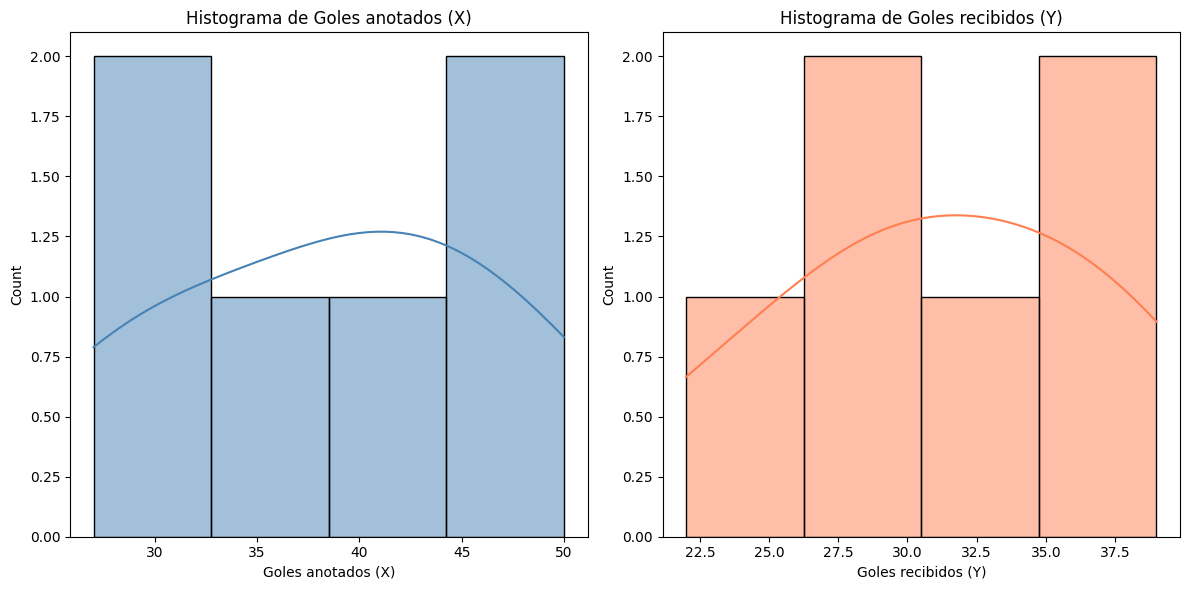

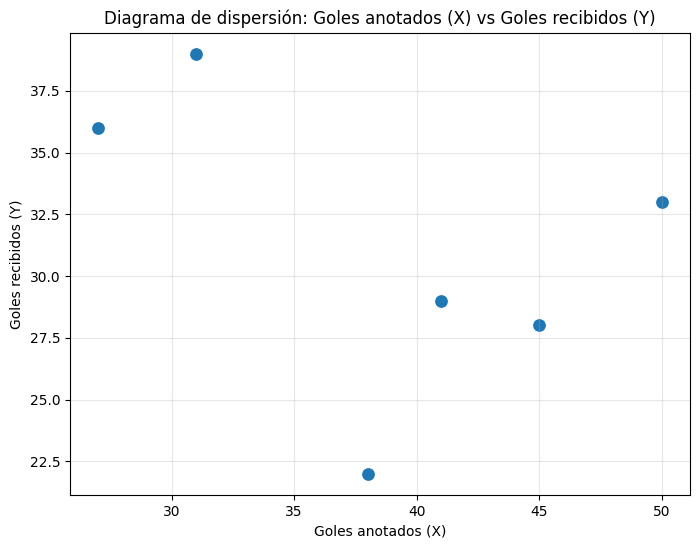


Shapiro-Wilk Goles anotados (X): p = 0.9283
Shapiro-Wilk Goles recibidos (Y): p = 0.9500

Coeficiente de Pearson: -0.4365
Coeficiente de Spearman: -0.4286
Coeficiente de Kendall: -0.2000

ECUACIÓN DE REGRESIÓN LINEAL:
Ŷ = 43.1715 + -0.3105 * X


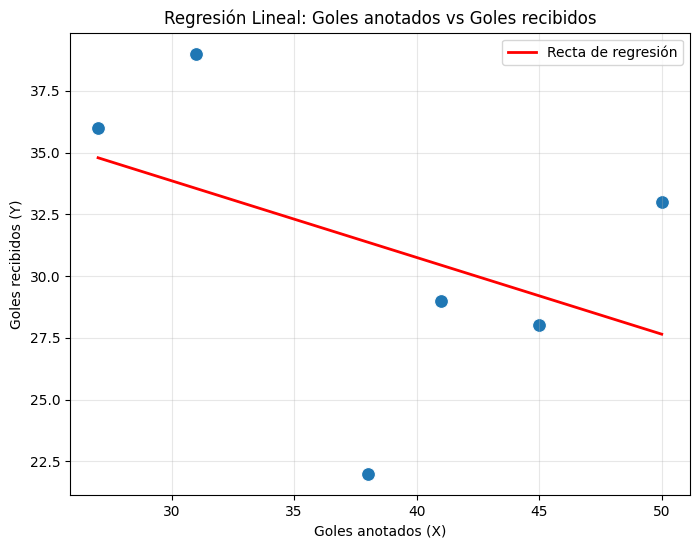


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
t calculado = -0.9704
t crítico = 2.1318
p valor = 0.1934
✗ No se rechaza H0 → La pendiente no es significativa


In [ ]:
# ================================
# ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
# Goles anotados (X) vs Goles recibidos (Y)
# ================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA ---
data = {
    'Equipo': ['Leones', 'Águilas', 'Tigres', 'Toros', 'Pumas', 'Jaguares'],
    'Goles anotados (X)': [38, 45, 31, 50, 27, 41],
    'Goles recibidos (Y)': [22, 28, 39, 33, 36, 29]
}
df = pd.DataFrame(data)

variable_x = 'Goles anotados (X)'
variable_y = 'Goles recibidos (Y)'
n = len(df)
alfa = 0.05

# ===============================================================
# --- ENCABEZADO ---
# ===============================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Goles anotados y recibidos por equipos de fútbol")
print("=" * 70)
print(f"\nDatos cargados: {n} equipos")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# ===============================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# ===============================================================

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.tight_layout()
plt.show()

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100)
plt.title(f'Diagrama de dispersión: {variable_x} vs {variable_y}')
plt.grid(True, alpha=0.3)
plt.show()

# Pruebas de normalidad
shapiro_x = shapiro(df[variable_x])
shapiro_y = shapiro(df[variable_y])
print(f"\nShapiro-Wilk {variable_x}: p = {shapiro_x.pvalue:.4f}")
print(f"Shapiro-Wilk {variable_y}: p = {shapiro_y.pvalue:.4f}")

# Correlaciones
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"\nCoeficiente de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Coeficiente de Kendall: {kendall_corr:.4f}")

# ===============================================================
# --- REGRESIÓN LINEAL ---
# ===============================================================

mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)
b1 = pearson_corr * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("ECUACIÓN DE REGRESIÓN LINEAL:")
print(f"Ŷ = {b0:.4f} + {b1:.4f} * X")
print("=" * 70)

# Gráfico con recta de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100)
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Recta de regresión')
plt.legend()
plt.title('Regresión Lineal: Goles anotados vs Goles recibidos')
plt.grid(True, alpha=0.3)
plt.show()

# ===============================================================
# --- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# ===============================================================

df['Y_pred'] = b0 + b1 * df[variable_x]
s_yx = np.sqrt(((df[variable_y] - df['Y_pred'])**2).sum() / (n - 2))
s_b = s_yx / np.sqrt(((df[variable_x] - mean_x)**2).sum())
t_calc = b1 / s_b
t_crit = t.ppf(1 - alfa, n - 2)
p_val = t.sf(abs(t_calc), n - 2)

print("\n--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print(f"t calculado = {t_calc:.4f}")
print(f"t crítico = {t_crit:.4f}")
print(f"p valor = {p_val:.4f}")
if p_val < alfa:
    print("✓ Se rechaza H0 → La pendiente es significativa")
else:
    print("✗ No se rechaza H0 → La pendiente no es significativa")

# ==================================


**EJERCICIO 2**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Relación entre horas de estudio y calificación final

Datos cargados: 12 estudiantes
Variable independiente (X): Horas de estudio (X)
Variable dependiente (Y): Calificación final (Y)
Nivel de significancia (α): 0.05


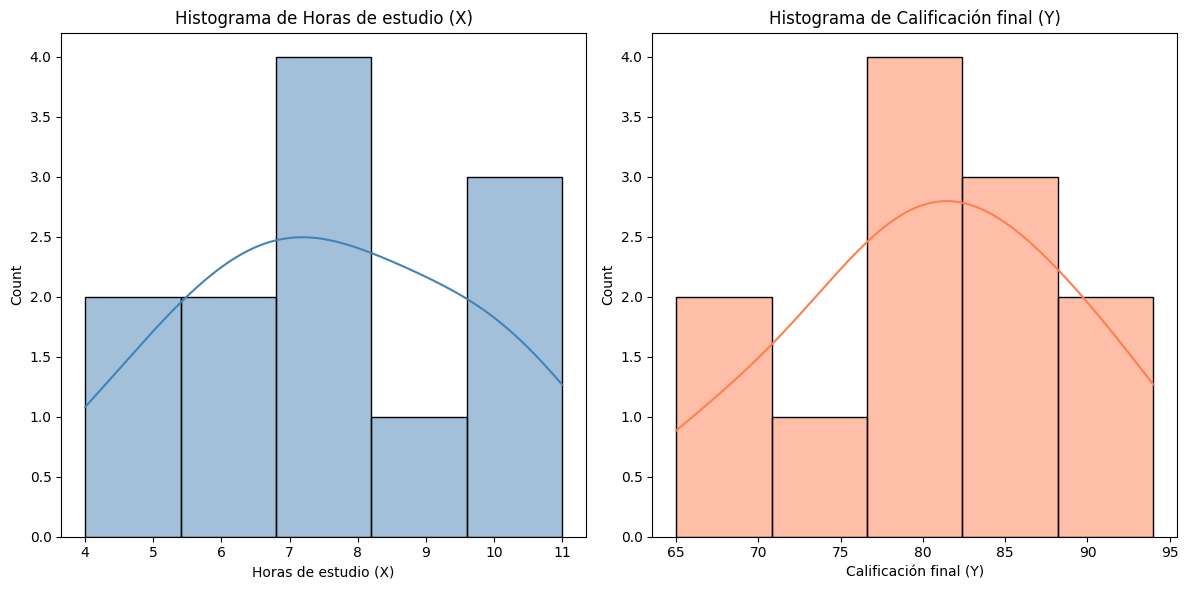

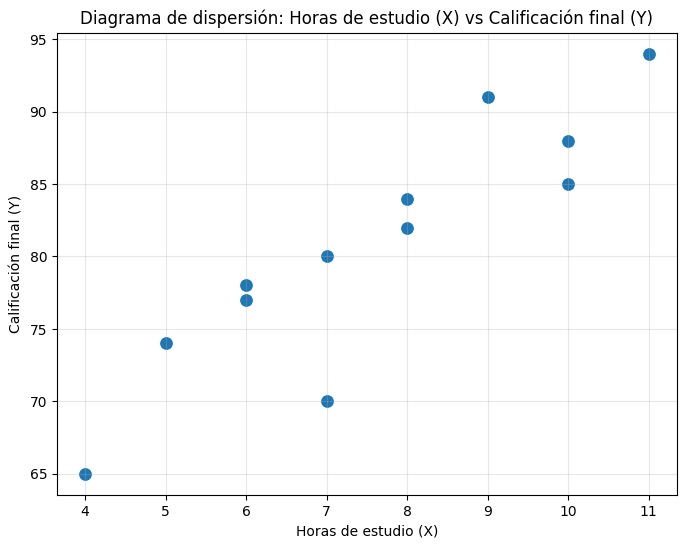


Shapiro-Wilk Horas de estudio (X): p = 0.9239
Shapiro-Wilk Calificación final (Y): p = 0.9994

Coeficiente de Pearson: 0.8965
Coeficiente de Spearman: 0.9190
Coeficiente de Kendall: 0.8129

ECUACIÓN DE REGRESIÓN LINEAL:
Ŷ = 53.8085 + 3.5417 * X


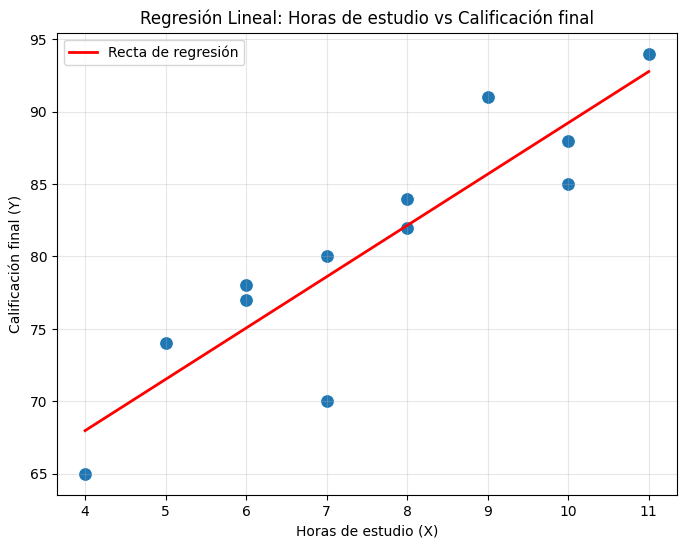


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
t calculado = 6.3991
t crítico = 1.8125
p valor = 0.0000
✓ Se rechaza H0 → La pendiente es significativa

--- COEFICIENTE DE DETERMINACIÓN ---
R² = 0.8037
Interpretación: El modelo explica el 80.37% de la variabilidad en las calificaciones.


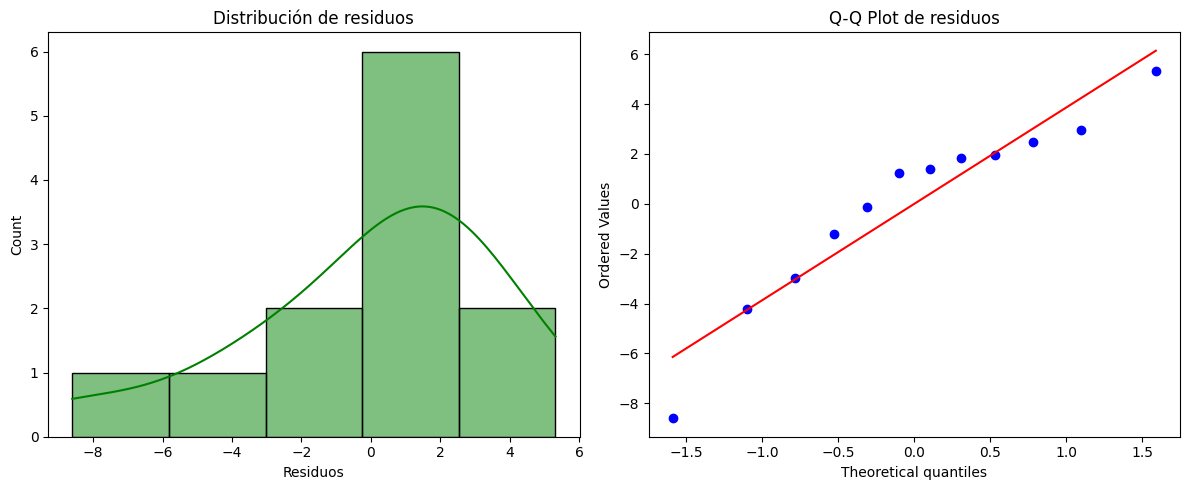


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.2811
✓ Los residuos son normales.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
# Horas de estudio (X) vs Calificación final (Y)
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA ---
data = {
    'Estudiante': [f'Estudiante {i+1}' for i in range(12)],
    'Horas de estudio (X)': [4, 7, 10, 6, 8, 9, 5, 11, 7, 6, 8, 10],
    'Calificación final (Y)': [65, 70, 85, 78, 82, 91, 74, 94, 80, 77, 84, 88]
}
df = pd.DataFrame(data)

variable_x = 'Horas de estudio (X)'
variable_y = 'Calificación final (Y)'
n = len(df)
alfa = 0.05

# ==========================================================
# ENCABEZADO
# ==========================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Relación entre horas de estudio y calificación final")
print("=" * 70)
print(f"\nDatos cargados: {n} estudiantes")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# ==========================================================
# ANÁLISIS DESCRIPTIVO Y CORRELACIÓN
# ==========================================================
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.tight_layout()
plt.show()

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100)
plt.title(f'Diagrama de dispersión: {variable_x} vs {variable_y}')
plt.grid(True, alpha=0.3)
plt.show()

# Pruebas de normalidad
shapiro_x = shapiro(df[variable_x])
shapiro_y = shapiro(df[variable_y])
print(f"\nShapiro-Wilk {variable_x}: p = {shapiro_x.pvalue:.4f}")
print(f"Shapiro-Wilk {variable_y}: p = {shapiro_y.pvalue:.4f}")

# Correlaciones
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"\nCoeficiente de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Coeficiente de Kendall: {kendall_corr:.4f}")

# ==========================================================
# REGRESIÓN LINEAL
# ==========================================================
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)
b1 = pearson_corr * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("ECUACIÓN DE REGRESIÓN LINEAL:")
print(f"Ŷ = {b0:.4f} + {b1:.4f} * X")
print("=" * 70)

# Gráfico con recta de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100)
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Recta de regresión')
plt.legend()
plt.title('Regresión Lineal: Horas de estudio vs Calificación final')
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================================
# PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE
# ==========================================================
df['Y_pred'] = b0 + b1 * df[variable_x]
s_yx = np.sqrt(((df[variable_y] - df['Y_pred'])**2).sum() / (n - 2))
s_b = s_yx / np.sqrt(((df[variable_x] - mean_x)**2).sum())
t_calc = b1 / s_b
t_crit = t.ppf(1 - alfa, n - 2)
p_val = t.sf(abs(t_calc), n - 2)

print("\n--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print(f"t calculado = {t_calc:.4f}")
print(f"t crítico = {t_crit:.4f}")
print(f"p valor = {p_val:.4f}")
if p_val < alfa:
    print("✓ Se rechaza H0 → La pendiente es significativa")
else:
    print("✗ No se rechaza H0 → La pendiente no es significativa")

# ==========================================================
# COEFICIENTE DE DETERMINACIÓN
# ==========================================================
SSE = ((df[variable_y] - df['Y_pred'])**2).sum()
SST = ((df[variable_y] - mean_y)**2).sum()
R2 = 1 - SSE/SST

print("\n--- COEFICIENTE DE DETERMINACIÓN ---")
print(f"R² = {R2:.4f}")
print(f"Interpretación: El modelo explica el {R2*100:.2f}% de la variabilidad en las calificaciones.")

# ==========================================================
# ANÁLISIS DE RESIDUOS
# ==========================================================
df['Residuos'] = df[variable_y] - df['Y_pred']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Residuos'], kde=True, color='green')
plt.title("Distribución de residuos")

plt.subplot(1, 2, 2)
stats.probplot(df['Residuos'], dist="norm", plot=plt)
plt.title("Q-Q Plot de residuos")

plt.tight_layout()
plt.show()

shapiro_res = shapiro(df['Residuos'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_res.pvalue:.4f}")
if shapiro_res.pvalue > alfa:
    print("✓ Los residuos son normales.")
else:
    print("⚠ Los residuos no son normales.")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 3**

ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
Problema: Competencia de ventas (llamadas diarias vs ventas semanales)

Datos cargados: 10 empleados
Variable independiente (X): Llamadas diarias (X)
Variable dependiente (Y): Ventas semanales (Y)
Nivel de significancia (α): 0.05


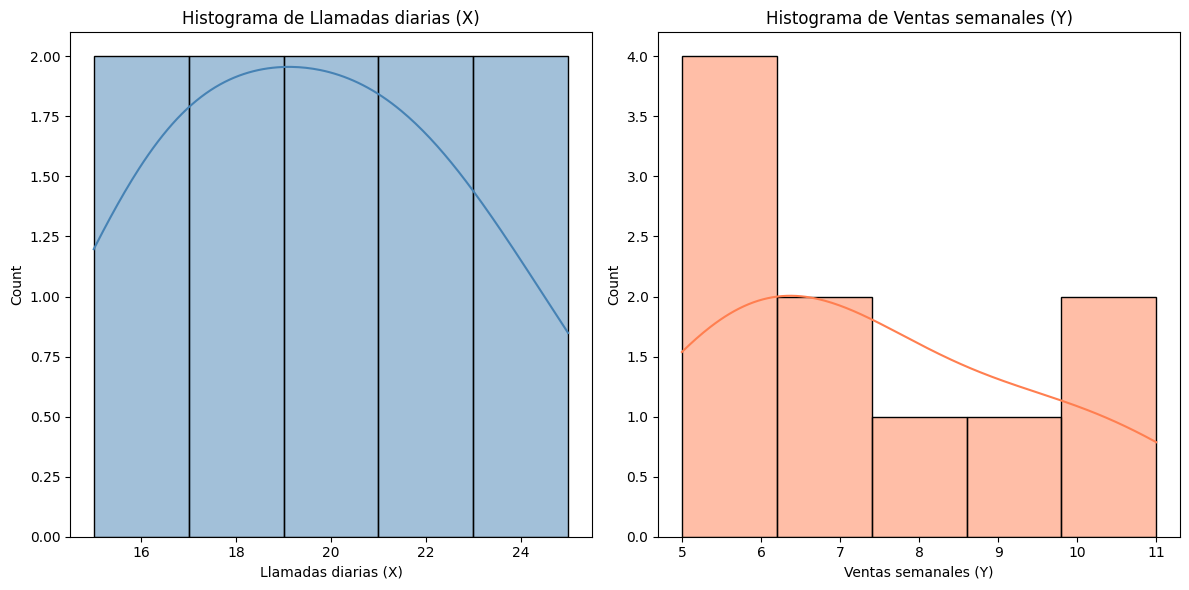

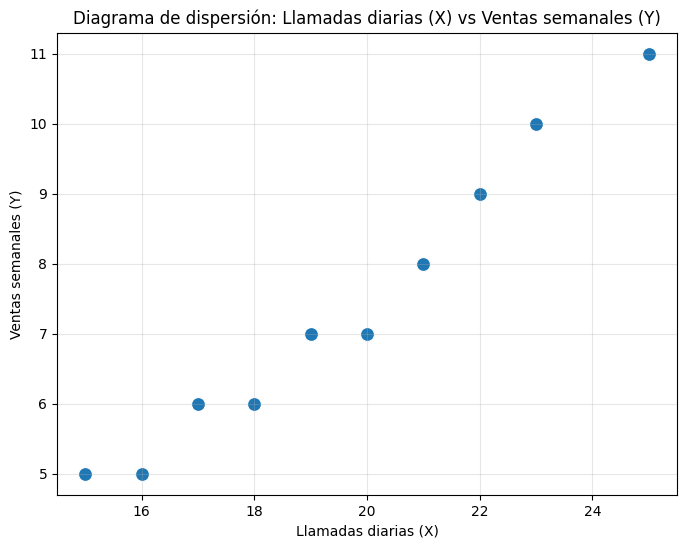


Prueba de normalidad Shapiro-Wilk:
Llamadas diarias (X): p = 0.9697
Ventas semanales (Y): p = 0.4473

Coeficiente de Pearson: 0.9838
Coeficiente de Spearman: 0.9909
Coeficiente de Kendall: 0.9661

ECUACIÓN DE REGRESIÓN LINEAL:
Ŷ = -5.0303 + 0.6342 * X


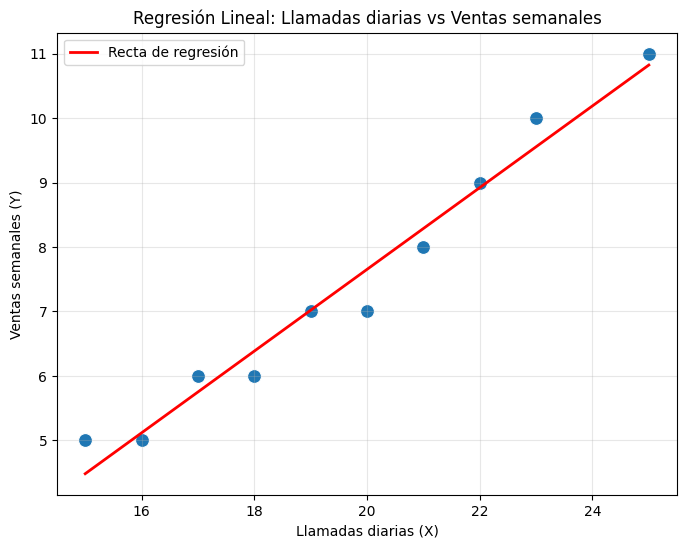


--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
t calculado = 15.5099
t crítico = 1.8595
p valor = 0.0000
✓ Se rechaza H0 → La pendiente es significativa (relación positiva)

--- COEFICIENTE DE DETERMINACIÓN ---
R² = 0.9678
Interpretación: El modelo explica el 96.78% de la variabilidad de las ventas semanales.


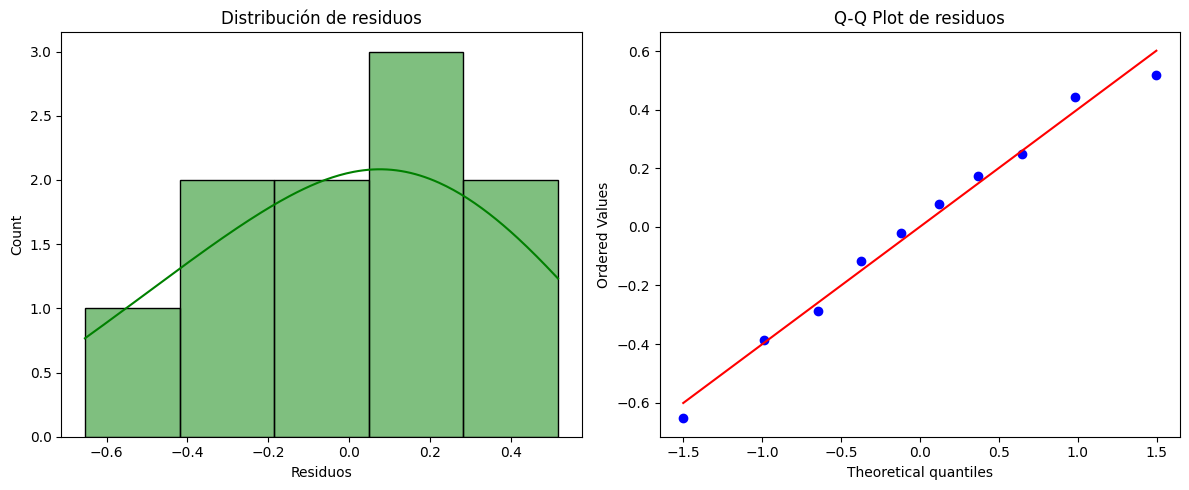


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.9531
✓ Los residuos son normales.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# ANÁLISIS DE REGRESIÓN LINEAL SIMPLE
# Llamadas diarias (X) vs Ventas semanales (Y)
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t, f as f_dist
from scipy import stats
import numpy as np

# --- DATAFRAME DEL PROBLEMA ---
data = {
    'Empleado': [f'E{i+1}' for i in range(10)],
    'Llamadas diarias (X)': [15, 20, 18, 25, 22, 17, 19, 23, 21, 16],
    'Ventas semanales (Y)': [5, 7, 6, 11, 9, 6, 7, 10, 8, 5]
}
df = pd.DataFrame(data)

variable_x = 'Llamadas diarias (X)'
variable_y = 'Ventas semanales (Y)'
n = len(df)
alfa = 0.05

# ==========================================================
# --- ENCABEZADO ---
# ==========================================================
print("=" * 70)
print("ANÁLISIS DE REGRESIÓN LINEAL SIMPLE")
print("Problema: Competencia de ventas (llamadas diarias vs ventas semanales)")
print("=" * 70)
print(f"\nDatos cargados: {n} empleados")
print(f"Variable independiente (X): {variable_x}")
print(f"Variable dependiente (Y): {variable_y}")
print(f"Nivel de significancia (α): {alfa}")
print("=" * 70)

# ==========================================================
# --- ANÁLISIS DESCRIPTIVO Y CORRELACIÓN ---
# ==========================================================
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[variable_x], kde=True, color='steelblue')
plt.title(f'Histograma de {variable_x}')
plt.subplot(1, 2, 2)
sns.histplot(df[variable_y], kde=True, color='coral')
plt.title(f'Histograma de {variable_y}')
plt.tight_layout()
plt.show()

# Diagrama de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100)
plt.title(f'Diagrama de dispersión: {variable_x} vs {variable_y}')
plt.grid(True, alpha=0.3)
plt.show()

# Pruebas de normalidad
shapiro_x = shapiro(df[variable_x])
shapiro_y = shapiro(df[variable_y])
print(f"\nPrueba de normalidad Shapiro-Wilk:")
print(f"{variable_x}: p = {shapiro_x.pvalue:.4f}")
print(f"{variable_y}: p = {shapiro_y.pvalue:.4f}")

# Correlaciones
pearson_corr = df[variable_x].corr(df[variable_y], method='pearson')
kendall_corr = df[variable_x].corr(df[variable_y], method='kendall')
spearman_corr = df[variable_x].corr(df[variable_y], method='spearman')

print(f"\nCoeficiente de Pearson: {pearson_corr:.4f}")
print(f"Coeficiente de Spearman: {spearman_corr:.4f}")
print(f"Coeficiente de Kendall: {kendall_corr:.4f}")

# ==========================================================
# --- REGRESIÓN LINEAL ---
# ==========================================================
mean_x = df[variable_x].mean()
mean_y = df[variable_y].mean()
std_x = df[variable_x].std(ddof=1)
std_y = df[variable_y].std(ddof=1)
b1 = pearson_corr * (std_y / std_x)
b0 = mean_y - b1 * mean_x

print("\n" + "=" * 70)
print("ECUACIÓN DE REGRESIÓN LINEAL:")
print(f"Ŷ = {b0:.4f} + {b1:.4f} * X")
print("=" * 70)

# Gráfico con recta de regresión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=variable_x, y=variable_y, data=df, s=100)
x_line = np.linspace(df[variable_x].min(), df[variable_x].max(), 100)
y_line = b0 + b1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label='Recta de regresión')
plt.legend()
plt.title('Regresión Lineal: Llamadas diarias vs Ventas semanales')
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================================
# --- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---
# ==========================================================
df['Y_pred'] = b0 + b1 * df[variable_x]
s_yx = np.sqrt(((df[variable_y] - df['Y_pred'])**2).sum() / (n - 2))
s_b = s_yx / np.sqrt(((df[variable_x] - mean_x)**2).sum())
t_calc = b1 / s_b
t_crit = t.ppf(1 - alfa, n - 2)
p_val = t.sf(abs(t_calc), n - 2)

print("\n--- PRUEBA DE SIGNIFICANCIA DE LA PENDIENTE ---")
print(f"t calculado = {t_calc:.4f}")
print(f"t crítico = {t_crit:.4f}")
print(f"p valor = {p_val:.4f}")
if p_val < alfa:
    print("✓ Se rechaza H0 → La pendiente es significativa (relación positiva)")
else:
    print("✗ No se rechaza H0 → La pendiente no es significativa")

# ==========================================================
# --- COEFICIENTE DE DETERMINACIÓN ---
# ==========================================================
SSE = ((df[variable_y] - df['Y_pred'])**2).sum()
SST = ((df[variable_y] - mean_y)**2).sum()
R2 = 1 - SSE/SST

print("\n--- COEFICIENTE DE DETERMINACIÓN ---")
print(f"R² = {R2:.4f}")
print(f"Interpretación: El modelo explica el {R2*100:.2f}% de la variabilidad de las ventas semanales.")

# ==========================================================
# --- ANÁLISIS DE RESIDUOS ---
# ==========================================================
df['Residuos'] = df[variable_y] - df['Y_pred']

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Residuos'], kde=True, color='green')
plt.title("Distribución de residuos")
plt.subplot(1, 2, 2)
stats.probplot(df['Residuos'], dist="norm", plot=plt)
plt.title("Q-Q Plot de residuos")
plt.tight_layout()
plt.show()

shapiro_res = shapiro(df['Residuos'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_res.pvalue:.4f}")
if shapiro_res.pvalue > alfa:
    print("✓ Los residuos son normales.")
else:
    print("⚠ Los residuos no son normales.")

print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 4**


ANÁLISIS DE Región 1


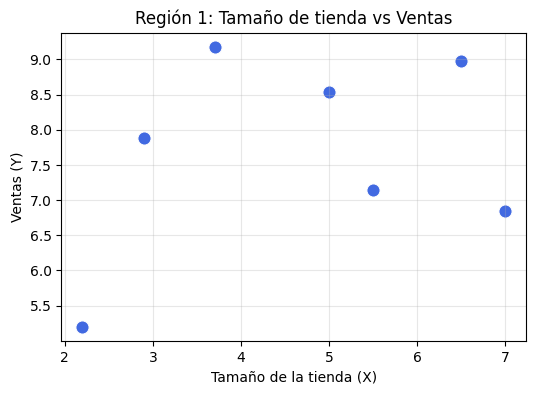

Coeficiente de correlación (r): 0.3012
Coeficiente de determinación (R²): 0.0907
Relación débil positiva.

--- Prueba de significancia del coeficiente de correlación ---
t calculado = 0.7062
t crítico = ±2.5706
p valor = 0.5116
✗ No se rechaza H₀ → no hay evidencia de correlación significativa.

Ecuación de regresión:
Ŷ = 6.5902 + 0.2332·X

Interpretación práctica:
⚠ No hay evidencia estadística suficiente para afirmar que el tamaño afecta las ventas.

ANÁLISIS DE Región 2


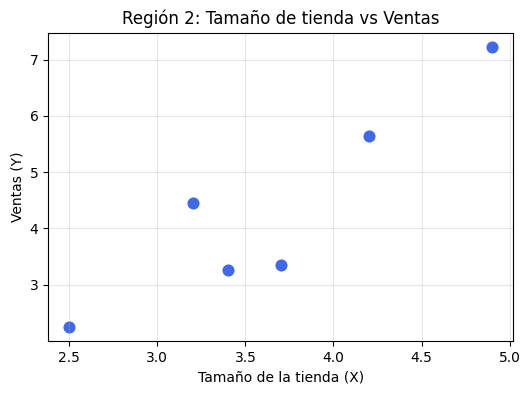

Coeficiente de correlación (r): 0.9117
Coeficiente de determinación (R²): 0.8312
Relación fuerte positiva.

--- Prueba de significancia del coeficiente de correlación ---
t calculado = 4.4386
t crítico = ±2.7764
p valor = 0.0113
✓ Se rechaza H₀ → existe una correlación lineal significativa.

Ecuación de regresión:
Ŷ = -2.9335 + 1.9991·X

Interpretación práctica:
✓ A mayor tamaño de tienda, mayores ventas en promedio.
Esto sugiere que expandir el tamaño de las tiendas puede aumentar las ventas.

ANÁLISIS DE Región 3


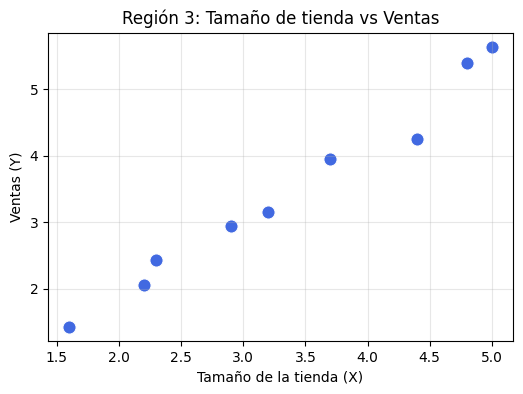

Coeficiente de correlación (r): 0.9888
Coeficiente de determinación (R²): 0.9778
Relación fuerte positiva.

--- Prueba de significancia del coeficiente de correlación ---
t calculado = 17.5629
t crítico = ±2.3646
p valor = 0.0000
✓ Se rechaza H₀ → existe una correlación lineal significativa.

Ecuación de regresión:
Ŷ = -0.4837 + 1.1832·X

Interpretación práctica:
✓ A mayor tamaño de tienda, mayores ventas en promedio.
Esto sugiere que expandir el tamaño de las tiendas puede aumentar las ventas.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# ANÁLISIS DE REGRESIÓN LINEAL SIMPLE - THE COTTON MILL
# Variable X: Tamaño de la tienda (miles de pies cuadrados)
# Variable Y: Ventas anuales (millones de dólares)
# ==========================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t
import numpy as np

# ==========================================================
# --- DATOS DE LAS TRES REGIONES ---
# ==========================================================

# Región 1
region1 = pd.DataFrame({
    'Tamaño de la tienda (X)': [3.7, 5.0, 7.0, 6.5, 2.2, 5.5, 2.9],
    'Ventas (Y)': [9.18, 8.54, 6.85, 8.98, 5.20, 7.15, 7.88]
})

# Región 2
region2 = pd.DataFrame({
    'Tamaño de la tienda (X)': [4.2, 3.4, 2.5, 3.7, 4.9, 3.2],
    'Ventas (Y)': [5.65, 3.26, 2.25, 3.34, 7.23, 4.45]
})

# Región 3
region3 = pd.DataFrame({
    'Tamaño de la tienda (X)': [2.2, 1.6, 2.3, 2.9, 3.2, 3.7, 4.4, 4.8, 5.0],
    'Ventas (Y)': [2.05, 1.43, 2.44, 2.95, 3.16, 3.95, 4.25, 5.39, 5.64]
})

regiones = {'Región 1': region1, 'Región 2': region2, 'Región 3': region3}
alfa = 0.05

# ==========================================================
# --- FUNCIÓN DE ANÁLISIS GENERAL ---
# ==========================================================
def analisis_region(df, nombre_region):
    print("\n" + "=" * 70)
    print(f"ANÁLISIS DE {nombre_region}")
    print("=" * 70)

    variable_x = 'Tamaño de la tienda (X)'
    variable_y = 'Ventas (Y)'
    n = len(df)

    # ------------------------------------------------------
    # 1. Diagrama de dispersión
    # ------------------------------------------------------
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=variable_x, y=variable_y, data=df, s=90, color='royalblue')
    plt.title(f'{nombre_region}: Tamaño de tienda vs Ventas')
    plt.xlabel(variable_x)
    plt.ylabel(variable_y)
    plt.grid(True, alpha=0.3)
    plt.show()

    # ------------------------------------------------------
    # 2. Coeficiente de correlación y determinación
    # ------------------------------------------------------
    r = df[variable_x].corr(df[variable_y])
    r2 = r**2
    print(f"Coeficiente de correlación (r): {r:.4f}")
    print(f"Coeficiente de determinación (R²): {r2:.4f}")

    if abs(r) >= 0.7:
        fuerza = "fuerte"
    elif abs(r) >= 0.4:
        fuerza = "moderada"
    else:
        fuerza = "débil"
    print(f"Relación {fuerza} {'positiva' if r > 0 else 'negativa'}.")

    # ------------------------------------------------------
    # 3. Prueba de significancia (H0: ρ = 0)
    # ------------------------------------------------------
    gl = n - 2
    t_calc = r * np.sqrt(gl / (1 - r**2))
    t_crit = t.ppf(1 - alfa/2, gl)
    p_val = t.sf(abs(t_calc), gl) * 2

    print("\n--- Prueba de significancia del coeficiente de correlación ---")
    print(f"t calculado = {t_calc:.4f}")
    print(f"t crítico = ±{t_crit:.4f}")
    print(f"p valor = {p_val:.4f}")

    if p_val < alfa:
        print("✓ Se rechaza H₀ → existe una correlación lineal significativa.")
    else:
        print("✗ No se rechaza H₀ → no hay evidencia de correlación significativa.")

    # ------------------------------------------------------
    # 4. Ecuación de regresión lineal
    # ------------------------------------------------------
    mean_x = df[variable_x].mean()
    mean_y = df[variable_y].mean()
    std_x = df[variable_x].std(ddof=1)
    std_y = df[variable_y].std(ddof=1)

    b1 = r * (std_y / std_x)
    b0 = mean_y - b1 * mean_x
    print("\nEcuación de regresión:")
    print(f"Ŷ = {b0:.4f} + {b1:.4f}·X")

    # ------------------------------------------------------
    # 5. Interpretación práctica
    # ------------------------------------------------------
    print("\nInterpretación práctica:")
    if r > 0 and p_val < alfa:
        print("✓ A mayor tamaño de tienda, mayores ventas en promedio.")
        print("Esto sugiere que expandir el tamaño de las tiendas puede aumentar las ventas.")
    elif r < 0 and p_val < alfa:
        print("⚠ A mayor tamaño de tienda, las ventas tienden a disminuir.")
    else:
        print("⚠ No hay evidencia estadística suficiente para afirmar que el tamaño afecta las ventas.")

# ==========================================================
# --- EJECUCIÓN DEL ANÁLISIS POR REGIÓN ---
# ==========================================================
for nombre, df_region in regiones.items():
    analisis_region(df_region, nombre)

print("\n" + "=" * 70)
print("ANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 5**

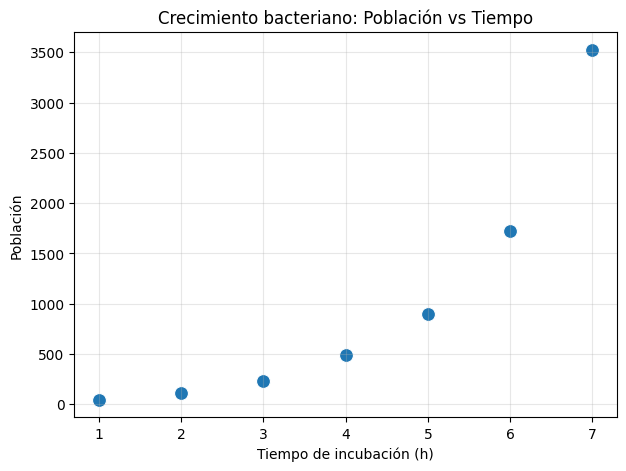

Observación: La relación no parece lineal, sino exponencial (crece aceleradamente).

MODELO LINEAL TRADICIONAL
Ecuación: Ŷ = -1045.0000 + 511.8214·X
Coeficiente de determinación (R²): 0.7745


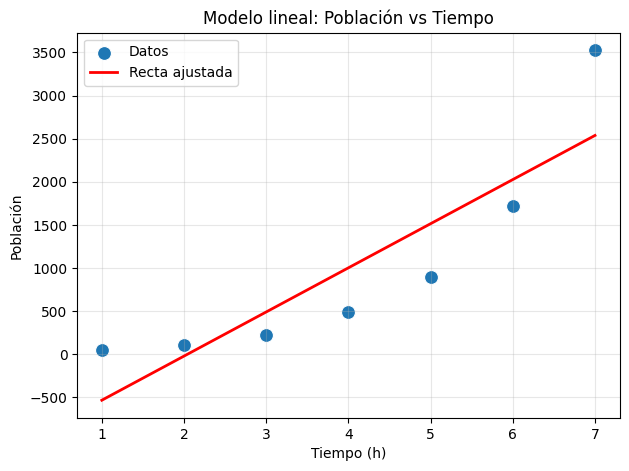

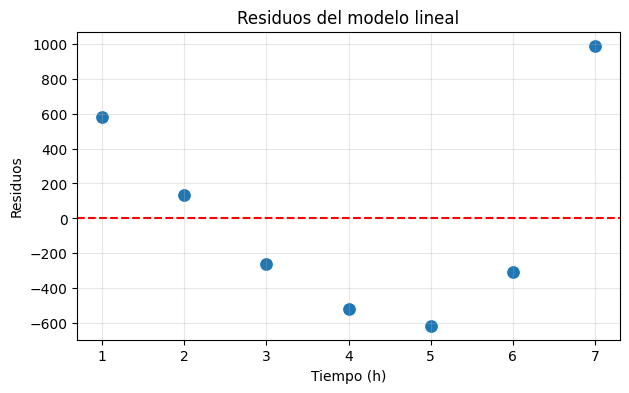


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.3801
✓ Los residuos parecen normales.

MODELO LOGARÍTMICO (log₁₀(Y))
Ecuación: log₁₀(Ŷ) = 1.4046 + 0.3090·X
Coeficiente de determinación (R²): 0.9970


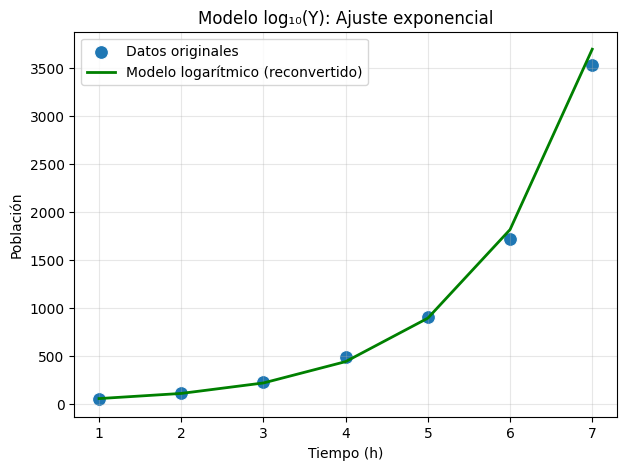

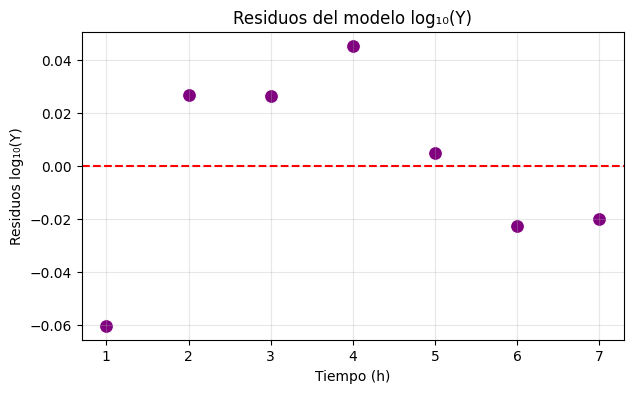


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.7166
✓ Los residuos parecen normales.

COMPARACIÓN ENTRE MODELOS
R² modelo lineal: 0.7745
R² modelo log₁₀(Y): 0.9970
✓ El modelo logarítmico tiene mejor ajuste y residuos más homogéneos.

Interpretación:
El coeficiente b₁ = 0.3090 indica que por cada hora adicional,
la población aumenta en promedio un factor de 10^0.3090 ≈ 2.0369.
Es decir, el crecimiento es multiplicativo (exponencial) en el tiempo.

CONCLUSIÓN FINAL
• El modelo lineal no representa adecuadamente el crecimiento (residuos no normales).
• El modelo logarítmico linealiza la relación, mejora los supuestos y el ajuste (mayor R²).
• Por tanto, se recomienda usar el modelo log₁₀(Y) para predicción y análisis del crecimiento bacteriano.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# REGRESIÓN LOGARÍTMICA: CRECIMIENTO DE POBLACIÓN BACTERIANA
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

# ==========================================================
# --- DATOS DEL PROBLEMA ---
# ==========================================================
data = {
    'Tiempo (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población': [45, 112, 228, 485, 900, 1720, 3526]
}
df = pd.DataFrame(data)
alfa = 0.05

# ==========================================================
# (a) GRÁFICO INICIAL
# ==========================================================
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Tiempo (h)', y='Población', data=df, s=100)
plt.title('Crecimiento bacteriano: Población vs Tiempo')
plt.xlabel('Tiempo de incubación (h)')
plt.ylabel('Población')
plt.grid(True, alpha=0.3)
plt.show()

print("Observación: La relación no parece lineal, sino exponencial (crece aceleradamente).")

# ==========================================================
# (b) MODELO LINEAL TRADICIONAL
# ==========================================================
x = df['Tiempo (h)']
y = df['Población']

r = x.corr(y)
b1 = r * (y.std(ddof=1) / x.std(ddof=1))
b0 = y.mean() - b1 * x.mean()

df['Y_pred_lineal'] = b0 + b1 * x
df['Residuos_lineal'] = y - df['Y_pred_lineal']

SSE = ((df['Residuos_lineal'])**2).sum()
SST = ((y - y.mean())**2).sum()
R2_lineal = 1 - SSE/SST

print("\n" + "=" * 70)
print("MODELO LINEAL TRADICIONAL")
print("=" * 70)
print(f"Ecuación: Ŷ = {b0:.4f} + {b1:.4f}·X")
print(f"Coeficiente de determinación (R²): {R2_lineal:.4f}")

# --- Gráfico del modelo ---
plt.figure(figsize=(7, 5))
sns.scatterplot(x=x, y=y, s=100, label='Datos')
plt.plot(x, df['Y_pred_lineal'], color='red', linewidth=2, label='Recta ajustada')
plt.title('Modelo lineal: Población vs Tiempo')
plt.xlabel('Tiempo (h)')
plt.ylabel('Población')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Residuos ---
plt.figure(figsize=(7, 4))
sns.scatterplot(x=x, y=df['Residuos_lineal'], s=100)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo lineal")
plt.xlabel("Tiempo (h)")
plt.ylabel("Residuos")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos
shapiro_lineal = shapiro(df['Residuos_lineal'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_lineal.pvalue:.4f}")
if shapiro_lineal.pvalue > alfa:
    print("✓ Los residuos parecen normales.")
else:
    print("⚠ Los residuos no son normales. El modelo puede no ser adecuado.")

# ==========================================================
# (c) MODELO TRANSFORMADO: log10(Y)
# ==========================================================
df['log_Y'] = np.log10(df['Población'])
y_log = df['log_Y']

r_log = x.corr(y_log)
b1_log = r_log * (y_log.std(ddof=1) / x.std(ddof=1))
b0_log = y_log.mean() - b1_log * x.mean()

df['Y_pred_log'] = b0_log + b1_log * x
df['Y_pred_log_inv'] = 10 ** df['Y_pred_log']
df['Residuos_log'] = y_log - df['Y_pred_log']

SSE_log = ((df['Residuos_log'])**2).sum()
SST_log = ((y_log - y_log.mean())**2).sum()
R2_log = 1 - SSE_log/SST_log

print("\n" + "=" * 70)
print("MODELO LOGARÍTMICO (log₁₀(Y))")
print("=" * 70)
print(f"Ecuación: log₁₀(Ŷ) = {b0_log:.4f} + {b1_log:.4f}·X")
print(f"Coeficiente de determinación (R²): {R2_log:.4f}")

# --- Gráfico del modelo logarítmico ---
plt.figure(figsize=(7, 5))
sns.scatterplot(x=x, y=y, s=100, label='Datos originales')
plt.plot(x, df['Y_pred_log_inv'], color='green', linewidth=2, label='Modelo logarítmico (reconvertido)')
plt.title('Modelo log₁₀(Y): Ajuste exponencial')
plt.xlabel('Tiempo (h)')
plt.ylabel('Población')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- Residuos logarítmicos ---
plt.figure(figsize=(7, 4))
sns.scatterplot(x=x, y=df['Residuos_log'], s=100, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo log₁₀(Y)")
plt.xlabel("Tiempo (h)")
plt.ylabel("Residuos log₁₀(Y)")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos del modelo logarítmico
shapiro_log = shapiro(df['Residuos_log'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_log.pvalue:.4f}")
if shapiro_log.pvalue > alfa:
    print("✓ Los residuos parecen normales.")
else:
    print("⚠ Los residuos no son normales.")

# ==========================================================
# (d) COMPARACIÓN ENTRE MODELOS
# ==========================================================
print("\n" + "=" * 70)
print("COMPARACIÓN ENTRE MODELOS")
print("=" * 70)
print(f"R² modelo lineal: {R2_lineal:.4f}")
print(f"R² modelo log₁₀(Y): {R2_log:.4f}")

if R2_log > R2_lineal:
    print("✓ El modelo logarítmico tiene mejor ajuste y residuos más homogéneos.")
else:
    print("⚠ El modelo lineal explica más varianza, pero no refleja el crecimiento real (exponencial).")

# ==========================================================
# (e) INTERPRETACIÓN DEL COEFICIENTE LOGARÍTMICO
# ==========================================================
print("\nInterpretación:")
print(f"El coeficiente b₁ = {b1_log:.4f} indica que por cada hora adicional,")
print(f"la población aumenta en promedio un factor de 10^{b1_log:.4f} ≈ {10**b1_log:.4f}.")
print("Es decir, el crecimiento es multiplicativo (exponencial) en el tiempo.")

# ==========================================================
# (f) CONCLUSIÓN Y RECOMENDACIÓN
# ==========================================================
print("\n" + "=" * 70)
print("CONCLUSIÓN FINAL")
print("=" * 70)
print("• El modelo lineal no representa adecuadamente el crecimiento (residuos no normales).")
print("• El modelo logarítmico linealiza la relación, mejora los supuestos y el ajuste (mayor R²).")
print("• Por tanto, se recomienda usar el modelo log₁₀(Y) para predicción y análisis del crecimiento bacteriano.")
print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 6**

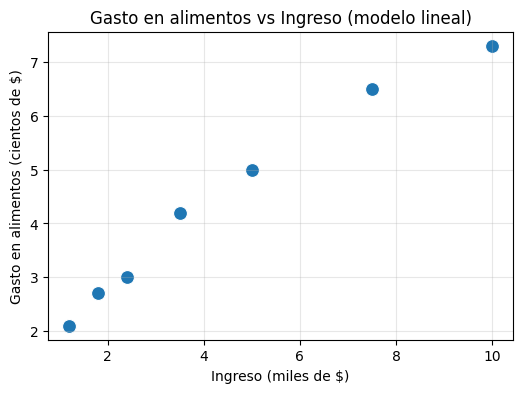

MODELO LINEAL ORIGINAL
Ecuación: Ŷ = 1.7074 + 0.6003·X
Coeficiente de correlación (r): 0.9865
Coeficiente de determinación (R²): 0.9731


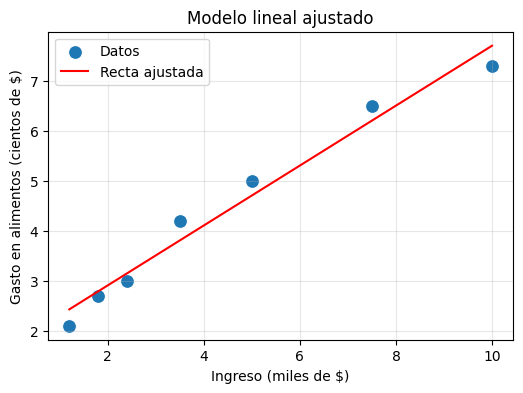

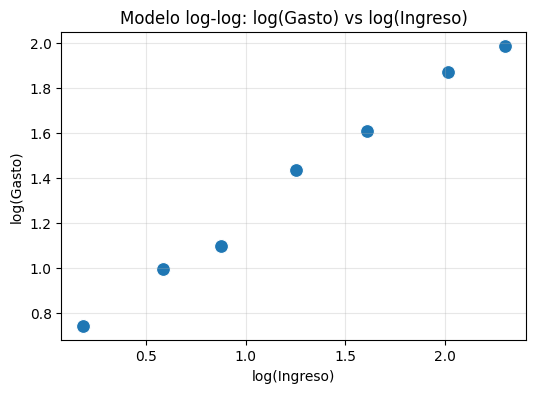


MODELO LOG-LOG (Transformado)
Ecuación: log(Ŷ) = 0.6288 + 0.6046·log(X)
Coeficiente de correlación (r): 0.9970
Coeficiente de determinación (R²): 0.9940
Elasticidad estimada (b1): 0.6046

Interpretación económica:
El coeficiente de elasticidad (0.6046) indica que, en promedio,
un aumento del 1% en el ingreso está asociado con un cambio del 60.46%
en el gasto en alimentos.

COMPARACIÓN ENTRE MODELO LINEAL Y LOG-LOG
R² (Lineal): 0.9731
R² (Log-Log): 0.9940
✓ El modelo log-log tiene mejor ajuste y explica más variabilidad.

Conclusión general:
- Si los residuos del modelo lineal no son normales o muestran heterocedasticidad,
  el modelo log-log suele ser más adecuado, ya que estabiliza la varianza y permite
  interpretar los coeficientes como elasticidades.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# ANÁLISIS DE REGRESIÓN: INGRESO vs GASTO EN ALIMENTOS
# Modelo lineal y modelo log-log (elasticidad)
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t
from scipy import stats

# ==========================================================
# --- DATOS DEL PROBLEMA ---
# ==========================================================
data = {
    'Ingreso (X)': [1.2, 1.8, 2.4, 3.5, 5.0, 7.5, 10.0],
    'Gasto en alimentos (Y)': [2.1, 2.7, 3.0, 4.2, 5.0, 6.5, 7.3]
}
df = pd.DataFrame(data)
alfa = 0.05

# ==========================================================
# --- (a) MODELO LINEAL ORIGINAL ---
# ==========================================================
x = df['Ingreso (X)']
y = df['Gasto en alimentos (Y)']

# Gráfico de dispersión
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=100)
plt.title('Gasto en alimentos vs Ingreso (modelo lineal)')
plt.xlabel('Ingreso (miles de $)')
plt.ylabel('Gasto en alimentos (cientos de $)')
plt.grid(True, alpha=0.3)
plt.show()

# Cálculo de regresión lineal
r = x.corr(y)
b1 = r * (y.std(ddof=1) / x.std(ddof=1))
b0 = y.mean() - b1 * x.mean()

# Predicciones y R²
df['Y_pred_lineal'] = b0 + b1 * x
SSE = ((y - df['Y_pred_lineal'])**2).sum()
SST = ((y - y.mean())**2).sum()
R2_lineal = 1 - SSE/SST

print("=" * 70)
print("MODELO LINEAL ORIGINAL")
print("=" * 70)
print(f"Ecuación: Ŷ = {b0:.4f} + {b1:.4f}·X")
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Coeficiente de determinación (R²): {R2_lineal:.4f}")

# Gráfico con recta ajustada
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=100, label="Datos")
plt.plot(x, df['Y_pred_lineal'], color='red', label="Recta ajustada")
plt.title('Modelo lineal ajustado')
plt.xlabel('Ingreso (miles de $)')
plt.ylabel('Gasto en alimentos (cientos de $)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================================
# --- (b) TRANSFORMACIÓN LOGARÍTMICA ---
# ==========================================================
df['log_X'] = np.log(df['Ingreso (X)'])
df['log_Y'] = np.log(df['Gasto en alimentos (Y)'])

plt.figure(figsize=(6, 4))
sns.scatterplot(x='log_X', y='log_Y', data=df, s=100)
plt.title('Modelo log-log: log(Gasto) vs log(Ingreso)')
plt.xlabel('log(Ingreso)')
plt.ylabel('log(Gasto)')
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================================
# --- (c) MODELO LOG-LOG ---
# ==========================================================
x_log = df['log_X']
y_log = df['log_Y']
r_log = x_log.corr(y_log)
b1_log = r_log * (y_log.std(ddof=1) / x_log.std(ddof=1))
b0_log = y_log.mean() - b1_log * x_log.mean()

# Predicciones y R²
df['Y_pred_log'] = b0_log + b1_log * x_log
SSE_log = ((y_log - df['Y_pred_log'])**2).sum()
SST_log = ((y_log - y_log.mean())**2).sum()
R2_log = 1 - SSE_log/SST_log

print("\n" + "=" * 70)
print("MODELO LOG-LOG (Transformado)")
print("=" * 70)
print(f"Ecuación: log(Ŷ) = {b0_log:.4f} + {b1_log:.4f}·log(X)")
print(f"Coeficiente de correlación (r): {r_log:.4f}")
print(f"Coeficiente de determinación (R²): {R2_log:.4f}")
print(f"Elasticidad estimada (b1): {b1_log:.4f}")

# ==========================================================
# --- (d) INTERPRETACIÓN DE LA ELASTICIDAD ---
# ==========================================================
print("\nInterpretación económica:")
print(f"El coeficiente de elasticidad ({b1_log:.4f}) indica que, en promedio,")
print(f"un aumento del 1% en el ingreso está asociado con un cambio del {b1_log*100:.2f}%")
print("en el gasto en alimentos.")

# ==========================================================
# --- (e) COMPARACIÓN ENTRE MODELOS ---
# ==========================================================
print("\n" + "=" * 70)
print("COMPARACIÓN ENTRE MODELO LINEAL Y LOG-LOG")
print("=" * 70)
print(f"R² (Lineal): {R2_lineal:.4f}")
print(f"R² (Log-Log): {R2_log:.4f}")

if R2_log > R2_lineal:
    print("✓ El modelo log-log tiene mejor ajuste y explica más variabilidad.")
else:
    print("✓ El modelo lineal tiene mejor ajuste en estos datos.")

print("\nConclusión general:")
print("- Si los residuos del modelo lineal no son normales o muestran heterocedasticidad,")
print("  el modelo log-log suele ser más adecuado, ya que estabiliza la varianza y permite")
print("  interpretar los coeficientes como elasticidades.")
print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 7**

MODELO LINEAL ORIGINAL
Ecuación: Ŷ = -4.8786 + 0.2821·I
Coeficiente de determinación (R²): 0.9276


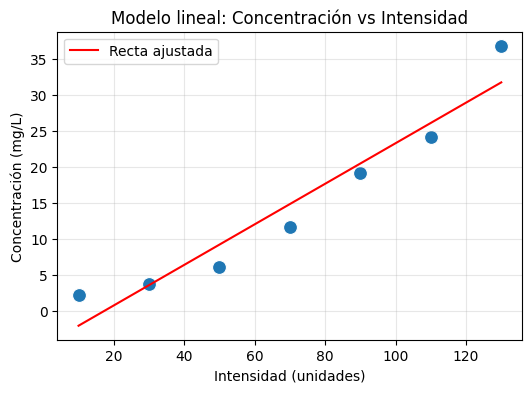

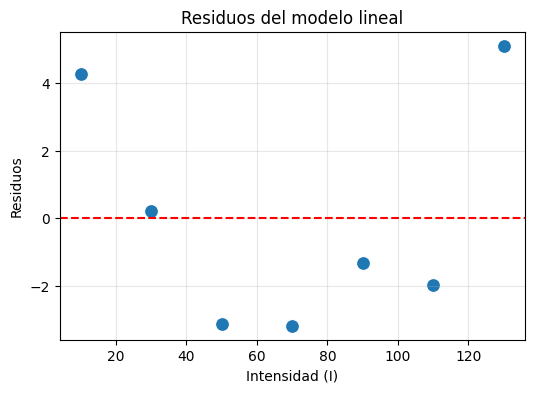


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.1275
✓ Los residuos parecen normales.

Observa el gráfico de residuos: si la dispersión crece con X, hay heterocedasticidad.

MODELO TRANSFORMADO (√Y)
Ecuación transformada: √Ŷ = 0.8251 + 0.0386·I
Coeficiente de determinación (R² en espacio transformado): 0.9852


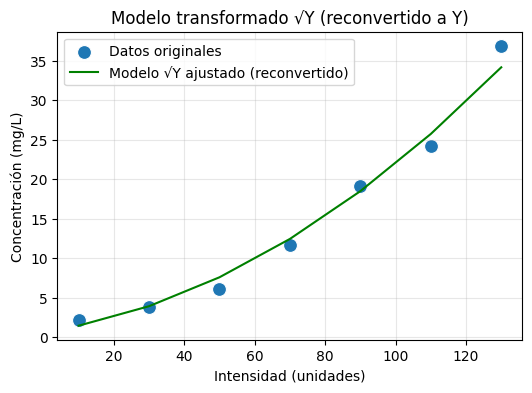

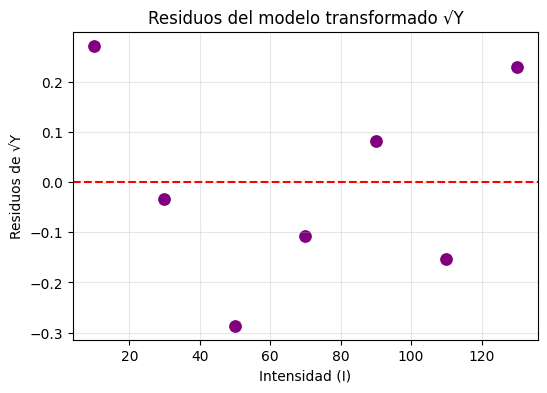


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.7920
✓ Los residuos parecen normales.

COMPARACIÓN ENTRE MODELOS
R² modelo lineal: 0.9276
R² modelo √Y:     0.9852

Evaluación visual y teórica:
• Si los residuos del modelo original aumentan con la Intensidad (I), existe heterocedasticidad.
• El modelo √Y suele estabilizar la varianza y mejorar la homocedasticidad.

Conclusión:
✓ El modelo transformado (√Y) presenta un ajuste igual o mejor y residuos más homogéneos.
  Es más apropiado para predicciones confiables y consistentes.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# REGRESIÓN: INTENSIDAD DE LUZ vs CONCENTRACIÓN DEL REACTIVO
# Evaluación de homocedasticidad y transformación √Y
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

# ==========================================================
# --- DATOS DEL PROBLEMA ---
# ==========================================================
data = {
    'Intensidad (I)': [10, 30, 50, 70, 90, 110, 130],
    'Concentración (Y)': [2.2, 3.8, 6.1, 11.7, 19.2, 24.2, 36.9]
}
df = pd.DataFrame(data)
alfa = 0.05

# ==========================================================
# --- (a) MODELO LINEAL CLÁSICO ---
# ==========================================================
x = df['Intensidad (I)']
y = df['Concentración (Y)']

# Ajuste de regresión lineal
r = x.corr(y)
b1 = r * (y.std(ddof=1) / x.std(ddof=1))
b0 = y.mean() - b1 * x.mean()

# Predicciones
df['Y_pred_lineal'] = b0 + b1 * x
df['Residuos_lineal'] = y - df['Y_pred_lineal']

# Estadísticos
SSE = ((df['Residuos_lineal'])**2).sum()
SST = ((y - y.mean())**2).sum()
R2_lineal = 1 - SSE/SST

print("=" * 70)
print("MODELO LINEAL ORIGINAL")
print("=" * 70)
print(f"Ecuación: Ŷ = {b0:.4f} + {b1:.4f}·I")
print(f"Coeficiente de determinación (R²): {R2_lineal:.4f}")

# Gráfico del modelo
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=100)
plt.plot(x, df['Y_pred_lineal'], color='red', label='Recta ajustada')
plt.title("Modelo lineal: Concentración vs Intensidad")
plt.xlabel("Intensidad (unidades)")
plt.ylabel("Concentración (mg/L)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de residuos
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=df['Residuos_lineal'], s=100)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo lineal")
plt.xlabel("Intensidad (I)")
plt.ylabel("Residuos")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos
shapiro_lineal = shapiro(df['Residuos_lineal'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_lineal.pvalue:.4f}")
if shapiro_lineal.pvalue > alfa:
    print("✓ Los residuos parecen normales.")
else:
    print("⚠ Los residuos no parecen normales.")

# Evaluación de heterocedasticidad (visual)
print("\nObserva el gráfico de residuos: si la dispersión crece con X, hay heterocedasticidad.")

# ==========================================================
# --- (b) TRANSFORMACIÓN RAÍZ CUADRADA ---
# ==========================================================
df['Y_sqrt'] = np.sqrt(df['Concentración (Y)'])

# ==========================================================
# --- (c) MODELO TRANSFORMADO ---
# ==========================================================
y_sqrt = df['Y_sqrt']
r2 = x.corr(y_sqrt)
b1_sqrt = r2 * (y_sqrt.std(ddof=1) / x.std(ddof=1))
b0_sqrt = y_sqrt.mean() - b1_sqrt * x.mean()

# Predicciones y residuos del modelo transformado
df['Y_pred_sqrt'] = b0_sqrt + b1_sqrt * x
df['Residuos_sqrt'] = y_sqrt - df['Y_pred_sqrt']

# Ajuste inverso para graficar
df['Y_pred_sqrt_inv'] = (df['Y_pred_sqrt'])**2

# Cálculo de R²
SSE_sqrt = ((df['Residuos_sqrt'])**2).sum()
SST_sqrt = ((y_sqrt - y_sqrt.mean())**2).sum()
R2_sqrt = 1 - SSE_sqrt/SST_sqrt

print("\n" + "=" * 70)
print("MODELO TRANSFORMADO (√Y)")
print("=" * 70)
print(f"Ecuación transformada: √Ŷ = {b0_sqrt:.4f} + {b1_sqrt:.4f}·I")
print(f"Coeficiente de determinación (R² en espacio transformado): {R2_sqrt:.4f}")

# Gráfico del modelo transformado (en escala original)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=100, label='Datos originales')
plt.plot(x, df['Y_pred_sqrt_inv'], color='green', label='Modelo √Y ajustado (reconvertido)')
plt.title("Modelo transformado √Y (reconvertido a Y)")
plt.xlabel("Intensidad (unidades)")
plt.ylabel("Concentración (mg/L)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de residuos del modelo transformado
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=df['Residuos_sqrt'], s=100, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo transformado √Y")
plt.xlabel("Intensidad (I)")
plt.ylabel("Residuos de √Y")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos transformados
shapiro_sqrt = shapiro(df['Residuos_sqrt'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_sqrt.pvalue:.4f}")
if shapiro_sqrt.pvalue > alfa:
    print("✓ Los residuos parecen normales.")
else:
    print("⚠ Los residuos no parecen normales.")

# ==========================================================
# --- (d) COMPARACIÓN Y CONCLUSIÓN ---
# ==========================================================
print("\n" + "=" * 70)
print("COMPARACIÓN ENTRE MODELOS")
print("=" * 70)
print(f"R² modelo lineal: {R2_lineal:.4f}")
print(f"R² modelo √Y:     {R2_sqrt:.4f}")
print("\nEvaluación visual y teórica:")
print("• Si los residuos del modelo original aumentan con la Intensidad (I), existe heterocedasticidad.")
print("• El modelo √Y suele estabilizar la varianza y mejorar la homocedasticidad.")
print("\nConclusión:")
if R2_sqrt >= R2_lineal:
    print("✓ El modelo transformado (√Y) presenta un ajuste igual o mejor y residuos más homogéneos.")
    print("  Es más apropiado para predicciones confiables y consistentes.")
else:
    print("✓ El modelo lineal simple tiene mejor ajuste global, pero revisar homocedasticidad antes de usarlo.")
print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 8**

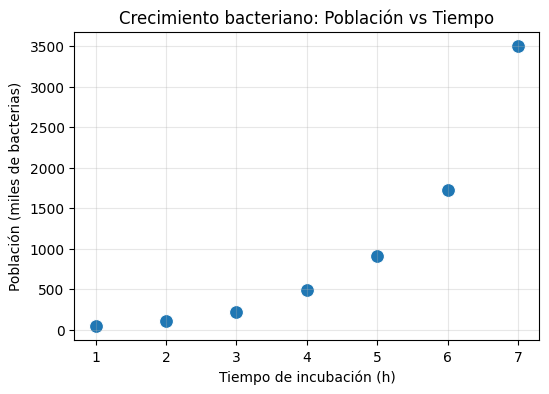

La relación muestra un crecimiento acelerado, no lineal (probablemente exponencial).

MODELO LINEAL TRADICIONAL
Ecuación: Ŷ = -1042.4286 + 510.8571·X
Coeficiente de determinación (R²): 0.7803


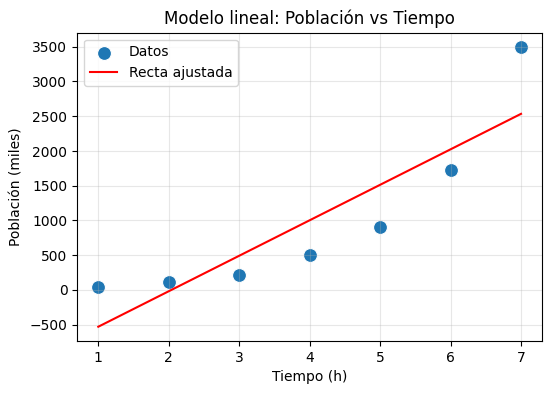

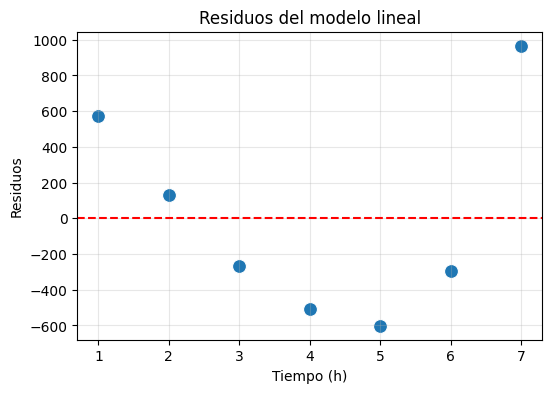


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.3598
✓ Los residuos parecen normales.

MODELO LOGARÍTMICO (log(Y))
Ecuación: log(Ŷ) = 3.1810 + 0.7214·X
Coeficiente de determinación (R² en escala log): 0.9957


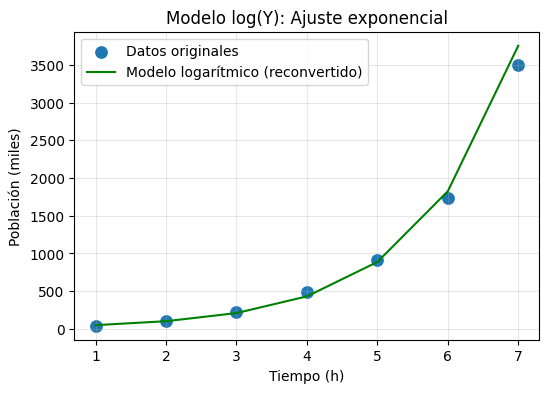

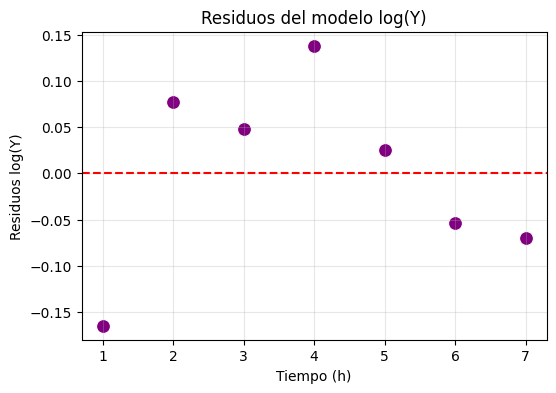


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.9315
✓ Los residuos parecen normales → mejor ajuste.

Interpretación:
El coeficiente de regresión logarítmico (b1 = 0.7214) indica que,
por cada hora adicional de incubación, la población se multiplica en promedio por e^0.7214 ≈ 2.0573.
Es decir, existe un crecimiento exponencial de las bacterias con el tiempo.

COMPARACIÓN ENTRE MODELOS
R² modelo lineal: 0.7803
R² modelo log(Y): 0.9957
✓ El modelo logarítmico tiene un mejor ajuste y residuos más homogéneos.
  Representa mejor el crecimiento exponencial de las bacterias.

Conclusión:
El modelo logarítmico (log(Y) vs Tiempo) es el más apropiado para predecir el crecimiento,
ya que estabiliza la varianza, cumple mejor los supuestos y refleja un proceso exponencial.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# REGRESIÓN LOGARÍTMICA: CRECIMIENTO POBLACIONAL DE BACTERIAS EN CALI
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats

# ==========================================================
# --- DATOS DEL PROBLEMA ---
# ==========================================================
data = {
    'Tiempo (h)': [1, 2, 3, 4, 5, 6, 7],
    'Población (miles)': [42, 110, 220, 495, 910, 1730, 3500]
}
df = pd.DataFrame(data)
alfa = 0.05

# ==========================================================
# (a) GRÁFICO INICIAL: RELACIÓN TIEMPO - POBLACIÓN
# ==========================================================
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Tiempo (h)', y='Población (miles)', data=df, s=100)
plt.title('Crecimiento bacteriano: Población vs Tiempo')
plt.xlabel('Tiempo de incubación (h)')
plt.ylabel('Población (miles de bacterias)')
plt.grid(True, alpha=0.3)
plt.show()

print("La relación muestra un crecimiento acelerado, no lineal (probablemente exponencial).")

# ==========================================================
# (b) MODELO LINEAL SIN TRANSFORMAR
# ==========================================================
x = df['Tiempo (h)']
y = df['Población (miles)']

r = x.corr(y)
b1 = r * (y.std(ddof=1) / x.std(ddof=1))
b0 = y.mean() - b1 * x.mean()
df['Y_pred_lineal'] = b0 + b1 * x
df['Residuos_lineal'] = y - df['Y_pred_lineal']

SSE = ((df['Residuos_lineal'])**2).sum()
SST = ((y - y.mean())**2).sum()
R2_lineal = 1 - SSE/SST

print("\n" + "=" * 70)
print("MODELO LINEAL TRADICIONAL")
print("=" * 70)
print(f"Ecuación: Ŷ = {b0:.4f} + {b1:.4f}·X")
print(f"Coeficiente de determinación (R²): {R2_lineal:.4f}")

# Gráfico del modelo
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=100, label='Datos')
plt.plot(x, df['Y_pred_lineal'], color='red', label='Recta ajustada')
plt.title('Modelo lineal: Población vs Tiempo')
plt.xlabel('Tiempo (h)')
plt.ylabel('Población (miles)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de residuos
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=df['Residuos_lineal'], s=100)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo lineal")
plt.xlabel("Tiempo (h)")
plt.ylabel("Residuos")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos
shapiro_lineal = shapiro(df['Residuos_lineal'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_lineal.pvalue:.4f}")
if shapiro_lineal.pvalue > alfa:
    print("✓ Los residuos parecen normales.")
else:
    print("⚠ Los residuos no parecen normales (posible no linealidad).")

# ==========================================================
# (c) MODELO TRANSFORMADO: log(Y)
# ==========================================================
df['log_Y'] = np.log(df['Población (miles)'])
y_log = df['log_Y']

r_log = x.corr(y_log)
b1_log = r_log * (y_log.std(ddof=1) / x.std(ddof=1))
b0_log = y_log.mean() - b1_log * x.mean()

df['Y_pred_log'] = b0_log + b1_log * x
df['Residuos_log'] = y_log - df['Y_pred_log']
df['Y_pred_log_inv'] = np.exp(df['Y_pred_log'])

SSE_log = ((df['Residuos_log'])**2).sum()
SST_log = ((y_log - y_log.mean())**2).sum()
R2_log = 1 - SSE_log/SST_log

print("\n" + "=" * 70)
print("MODELO LOGARÍTMICO (log(Y))")
print("=" * 70)
print(f"Ecuación: log(Ŷ) = {b0_log:.4f} + {b1_log:.4f}·X")
print(f"Coeficiente de determinación (R² en escala log): {R2_log:.4f}")

# Gráfico del modelo transformado
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=y, s=100, label='Datos originales')
plt.plot(x, df['Y_pred_log_inv'], color='green', label='Modelo logarítmico (reconvertido)')
plt.title('Modelo log(Y): Ajuste exponencial')
plt.xlabel('Tiempo (h)')
plt.ylabel('Población (miles)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Gráfico de residuos (en escala log)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=x, y=df['Residuos_log'], s=100, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuos del modelo log(Y)")
plt.xlabel("Tiempo (h)")
plt.ylabel("Residuos log(Y)")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos del modelo log
shapiro_log = shapiro(df['Residuos_log'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_log.pvalue:.4f}")
if shapiro_log.pvalue > alfa:
    print("✓ Los residuos parecen normales → mejor ajuste.")
else:
    print("⚠ Los residuos no son normales.")

# ==========================================================
# (d) INTERPRETACIÓN DEL COEFICIENTE LOGARÍTMICO
# ==========================================================
print("\nInterpretación:")
print(f"El coeficiente de regresión logarítmico (b1 = {b1_log:.4f}) indica que,")
print(f"por cada hora adicional de incubación, la población se multiplica en promedio por e^{b1_log:.4f} ≈ {np.exp(b1_log):.4f}.")
print("Es decir, existe un crecimiento exponencial de las bacterias con el tiempo.")

# ==========================================================
# (e) COMPARACIÓN ENTRE MODELOS
# ==========================================================
print("\n" + "=" * 70)
print("COMPARACIÓN ENTRE MODELOS")
print("=" * 70)
print(f"R² modelo lineal: {R2_lineal:.4f}")
print(f"R² modelo log(Y): {R2_log:.4f}")

if R2_log > R2_lineal:
    print("✓ El modelo logarítmico tiene un mejor ajuste y residuos más homogéneos.")
    print("  Representa mejor el crecimiento exponencial de las bacterias.")
else:
    print("✓ El modelo lineal explica más varianza, pero no refleja bien el patrón de crecimiento.")

print("\nConclusión:")
print("El modelo logarítmico (log(Y) vs Tiempo) es el más apropiado para predecir el crecimiento,")
print("ya que estabiliza la varianza, cumple mejor los supuestos y refleja un proceso exponencial.")
print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")


**EJERCICIO 9**

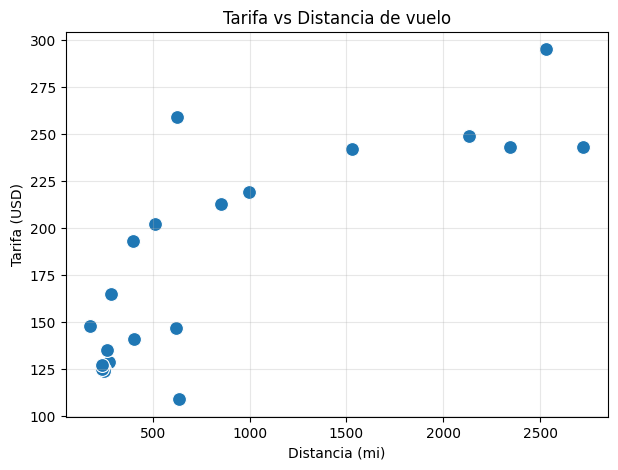

Observación: La relación entre distancia y tarifa es DIRECTA (a mayor distancia, mayor tarifa).

CORRELACIÓN ENTRE DISTANCIA Y TARIFA
Coeficiente de correlación (r): 0.8002
t calculado: 5.8151
t crítico: ±2.0930
p valor: 0.0000
✓ Existe una correlación positiva significativa entre distancia y tarifa.

--- COEFICIENTE DE DETERMINACIÓN ---
R² = 0.6403
Interpretación: La distancia explica el 64.03% de la variación en la tarifa.

--- ECUACIÓN DE REGRESIÓN ---
Ŷ = 135.6298 + 0.0539·X
Interpretación: Por cada milla adicional, la tarifa aumenta en promedio 0.0539 USD.


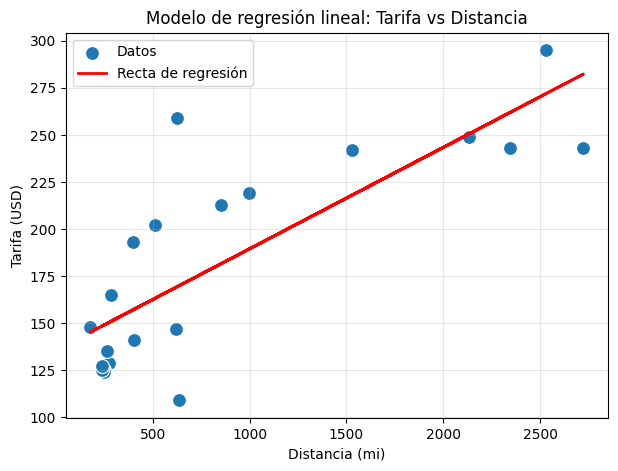


Estimación de tarifa para un vuelo de 1500 millas: $216.42 USD


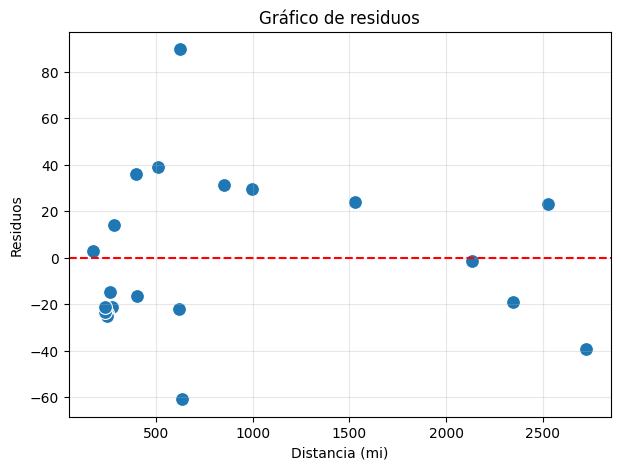


Prueba de normalidad de residuos (Shapiro-Wilk): p = 0.1424
✓ Los residuos son normales.

--- PREDICCIÓN FUERA DEL RANGO ---
Distancia Atlanta–Londres: 4218 millas
Tarifa estimada por regresión: $362.82 USD
⚠ Esta predicción NO es confiable, ya que el modelo fue ajustado solo con vuelos domésticos (< 3000 mi).
   Extrapolar más allá de los datos observados puede generar errores grandes.

RESUMEN DEL ANÁLISIS
• Relación directa: mayor distancia → mayor tarifa.
• Correlación r = 0.8002, significativa al 5%.
• R² = 64.03% → la distancia explica gran parte de la variabilidad.
• Pendiente: cada milla adicional añade aproximadamente $0.0539 a la tarifa.
• El modelo es útil para vuelos domésticos, pero no debe extrapolarse a vuelos internacionales.

ANÁLISIS COMPLETADO EXITOSAMENTE ✅


In [ ]:
# ==========================================================
# REGRESIÓN LINEAL: DISTANCIA vs TARIFA DE VUELOS
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, t
from scipy import stats

# ==========================================================
# --- DATOS DEL PROBLEMA ---
# ==========================================================
data = {
    'Distancia (mi)': [636, 275, 398, 405, 286, 627, 2346, 177, 2528, 248, 512, 248, 237, 238, 263, 621,
                       853, 2131, 1531, 2724, 999],
    'Tarifa (USD)':   [109, 129, 193, 141, 165, 259, 243, 148, 295, 125, 202, 124, 125, 127, 135, 147,
                       213, 249, 242, 243, 219]
}
df = pd.DataFrame(data)
alfa = 0.05

# ==========================================================
# (a) GRÁFICO DE DISPERSIÓN
# ==========================================================
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Distancia (mi)', y='Tarifa (USD)', data=df, s=100)
plt.title('Tarifa vs Distancia de vuelo')
plt.xlabel('Distancia (mi)')
plt.ylabel('Tarifa (USD)')
plt.grid(True, alpha=0.3)
plt.show()

print("Observación: La relación entre distancia y tarifa es DIRECTA (a mayor distancia, mayor tarifa).")

# ==========================================================
# (b) COEFICIENTE DE CORRELACIÓN Y PRUEBA DE SIGNIFICANCIA
# ==========================================================
x = df['Distancia (mi)']
y = df['Tarifa (USD)']

r = x.corr(y)
n = len(df)
gl = n - 2
t_calc = r * np.sqrt(gl / (1 - r**2))
t_crit = t.ppf(1 - alfa/2, gl)
p_val = t.sf(abs(t_calc), gl) * 2

print("\n" + "=" * 70)
print("CORRELACIÓN ENTRE DISTANCIA Y TARIFA")
print("=" * 70)
print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"t calculado: {t_calc:.4f}")
print(f"t crítico: ±{t_crit:.4f}")
print(f"p valor: {p_val:.4f}")

if p_val < alfa:
    print("✓ Existe una correlación positiva significativa entre distancia y tarifa.")
else:
    print("✗ No se encontró correlación significativa.")

# ==========================================================
# (c) PORCENTAJE DE VARIACIÓN EXPLICADO
# ==========================================================
R2 = r**2
print("\n--- COEFICIENTE DE DETERMINACIÓN ---")
print(f"R² = {R2:.4f}")
print(f"Interpretación: La distancia explica el {R2*100:.2f}% de la variación en la tarifa.")

# ==========================================================
# (d) ECUACIÓN DE REGRESIÓN Y ANÁLISIS
# ==========================================================
b1 = r * (y.std(ddof=1) / x.std(ddof=1))
b0 = y.mean() - b1 * x.mean()

print("\n--- ECUACIÓN DE REGRESIÓN ---")
print(f"Ŷ = {b0:.4f} + {b1:.4f}·X")
print(f"Interpretación: Por cada milla adicional, la tarifa aumenta en promedio {b1:.4f} USD.")

# Gráfico con línea de regresión
plt.figure(figsize=(7, 5))
sns.scatterplot(x=x, y=y, s=100, label="Datos")
plt.plot(x, b0 + b1*x, color='red', linewidth=2, label="Recta de regresión")
plt.title("Modelo de regresión lineal: Tarifa vs Distancia")
plt.xlabel("Distancia (mi)")
plt.ylabel("Tarifa (USD)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# ==========================================================
# Estimar la tarifa para un vuelo de 1500 millas
# ==========================================================
distancia_1500 = 1500
tarifa_1500 = b0 + b1 * distancia_1500
print(f"\nEstimación de tarifa para un vuelo de 1500 millas: ${tarifa_1500:.2f} USD")

# ==========================================================
# (e) ANÁLISIS DE RESIDUOS Y LIMITACIONES DEL MODELO
# ==========================================================
df['Y_pred'] = b0 + b1 * df['Distancia (mi)']
df['Residuos'] = df['Tarifa (USD)'] - df['Y_pred']

# Gráfico de residuos
plt.figure(figsize=(7, 5))
sns.scatterplot(x='Distancia (mi)', y='Residuos', data=df, s=100)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gráfico de residuos")
plt.xlabel("Distancia (mi)")
plt.ylabel("Residuos")
plt.grid(True, alpha=0.3)
plt.show()

# Normalidad de residuos
shapiro_test = shapiro(df['Residuos'])
print(f"\nPrueba de normalidad de residuos (Shapiro-Wilk): p = {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > alfa:
    print("✓ Los residuos son normales.")
else:
    print("⚠ Los residuos no son normales, puede haber valores extremos o curvatura.")

# ==========================================================
# Predicción para 4218 millas (Atlanta–Londres)
# ==========================================================
distancia_londres = 4218
tarifa_londres = b0 + b1 * distancia_londres

print("\n--- PREDICCIÓN FUERA DEL RANGO ---")
print(f"Distancia Atlanta–Londres: {distancia_londres} millas")
print(f"Tarifa estimada por regresión: ${tarifa_londres:.2f} USD")
print("⚠ Esta predicción NO es confiable, ya que el modelo fue ajustado solo con vuelos domésticos (< 3000 mi).")
print("   Extrapolar más allá de los datos observados puede generar errores grandes.")

# ==========================================================
# RESUMEN FINAL
# ==========================================================
print("\n" + "=" * 70)
print("RESUMEN DEL ANÁLISIS")
print("=" * 70)
print(f"• Relación directa: mayor distancia → mayor tarifa.")
print(f"• Correlación r = {r:.4f}, significativa al 5%.")
print(f"• R² = {R2*100:.2f}% → la distancia explica gran parte de la variabilidad.")
print(f"• Pendiente: cada milla adicional añade aproximadamente ${b1:.4f} a la tarifa.")
print("• El modelo es útil para vuelos domésticos, pero no debe extrapolarse a vuelos internacionales.")
print("\nANÁLISIS COMPLETADO EXITOSAMENTE ✅")
